In [67]:
import mysql.connector
from mysql.connector import Error
import csv

# Database credentials
host = 'instrux.live'
user = 'intern_smartfan'
password = 'Smartfan78?INTERN'
database = 'smartfan'
port = 3306

# Define the helpdb class
class helpdb:
    def __init__(self):
        try:
            self.conn = mysql.connector.connect(
                host=host,
                user=user,
                password=password,
                database=database,
                port=port
            )
            if self.conn.is_connected():
                print("Connected to the database")
        except Error as e:
            print(f"Error while connecting to MySQL: {e}")

    def fetch(self):
        try:
            cursor = self.conn.cursor()
            query = """
            SELECT d.*, b.*
            FROM smartfan.data_bulk_onchange d
            INNER JOIN data_batch b ON b.id = d.batch_id
            WHERE fan_id = 175
            """
            cursor.execute(query)
            rows = cursor.fetchall()
            
            # Save data to CSV file
            with open('data.csv', mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([i[0] for i in cursor.description])  # Write headers
                writer.writerows(rows)  # Write data rows

            cursor.close()
            print("Data saved to data.csv")
        except Error as e:
            print(f"Error while fetching data: {e}")
        finally:
            if self.conn.is_connected():
                self.conn.close()
                print("MySQL connection is closed")

# Create an instance of the helpdb class and fetch data
helper = helpdb()
helper.fetch()


In [68]:
import mysql.connector
from mysql.connector import Error
import csv
import time

# Database credentials
host = 'instrux.live'
user = 'intern_smartfan'
password = 'Smartfan78?INTERN'
database = 'smartfan'
port = 3306

# Define the helpdb class
class helpdb:
    def __init__(self):
        try:
            self.conn = mysql.connector.connect(
                host=host,
                user=user,
                password=password,
                database=database,
                port=port,
                connection_timeout=300  # Increase connection timeout to 5 minutes
            )
            if self.conn.is_connected():
                print("Connected to the database")
        except Error as e:
            print(f"Error while connecting to MySQL: {e}")

    def fetch(self):
        try:
            cursor = self.conn.cursor()
            query = """
            SELECT d.*, b.*
            FROM smartfan.data_bulk_onchange d
            INNER JOIN data_batch b ON b.id = d.batch_id
            WHERE fan_id = 175
            LIMIT 100  -- Limit the number of rows fetched for testing
            """
            start_time = time.time()
            cursor.execute(query)
            rows = cursor.fetchall()
            print(f"Query executed in {time.time() - start_time} seconds")
            
            # Save data to CSV file
            with open('data.csv', mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([i[0] for i in cursor.description])  # Write headers
                writer.writerows(rows)  # Write data rows

            cursor.close()
            print("Data saved to data.csv")
        except Error as e:
            print(f"Error while fetching data: {e}")
        finally:
            if self.conn.is_connected():
                self.conn.close()
                print("MySQL connection is closed")

# Create an instance of the helpdb class and fetch data
helper = helpdb()
helper.fetch()


Make dataframe

In [69]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()


,id,batch_id,timestamp,temperature,humidity,mode,speed,opTime,eSpent,eSaved,timestampReal,datetime,id.1,timestamp_server,datetime_datetime,datetime_timestamp,fan_id
0,83558,38065,58323770,25.0,48.0,0,0,0,0,0,1604990570,2020-11-10 11:42:50,38065,1605184718,2020-11-12 17:38:38,2020-11-12 17:38:38,175
1,83559,38065,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,38065,1605184718,2020-11-12 17:38:38,2020-11-12 17:38:38,175
2,83560,38065,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,38065,1605184718,2020-11-12 17:38:38,2020-11-12 17:38:38,175
3,83561,38065,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,38065,1605184718,2020-11-12 17:38:38,2020-11-12 17:38:38,175
4,83562,38065,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,38065,1605184718,2020-11-12 17:38:38,2020-11-12 17:38:38,175


removing same column

In [70]:

same_column=df.columns[df.nunique()==1]
df=df.drop(columns=same_column)
df.head()



,id,timestamp,temperature,humidity,mode,speed,opTime,eSpent,eSaved,timestampReal,datetime
0,83558,58323770,25.0,48.0,0,0,0,0,0,1604990570,2020-11-10 11:42:50
1,83559,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51
2,83560,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51
3,83561,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51
4,83562,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51


Set date time

In [71]:
df["datetime"] = pd.to_datetime(df["datetime"], format='%Y-%m-%d %H:%M:%S')
def get_hour(dt):
    return dt.hour
def get_month(dt):
    return dt.month
def get_year(dt):
    return dt.year

def get_min(dt):
    return dt.minute
def get_day(dt):
    return dt.day
df["year"]=df["datetime"].map(get_year)


df["month"]=df["datetime"].map(get_month)
df["day"]=df["datetime"].map(get_day)
df["hour"]=df["datetime"].map(get_hour)
df["minutes"]=df["datetime"].map(get_min)

df.head()






,id,timestamp,temperature,humidity,mode,speed,opTime,eSpent,eSaved,timestampReal,datetime,year,month,day,hour,minutes
0,83558,58323770,25.0,48.0,0,0,0,0,0,1604990570,2020-11-10 11:42:50,2020,11,10,11,42
1,83559,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,2020,11,10,11,42
2,83560,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,2020,11,10,11,42
3,83561,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,2020,11,10,11,42
4,83562,58323771,NaN,NaN,9,0,0,0,0,1604990571,2020-11-10 11:42:51,2020,11,10,11,42


Cleaning data with respect to minutes

In [72]:
data_frame= df.groupby('minutes').mean().reset_index()
data_frame.head()

,minutes,id,timestamp,temperature,humidity,mode,speed,opTime,eSpent,eSaved,timestampReal,datetime,year,month,day,hour
0,0,83650.0,5.847604e+07,30.000000,30.000000,0.0,1.000000,5430.000000,54300.000000,76020.0,1.605143e+09,2020-11-12 06:00:36.000000000,2020.0,11.0,12.000000,6.0
1,1,83628.0,5.845809e+07,30.666667,27.333333,0.0,1.333333,2884.333333,42851.666667,54389.0,1.605125e+09,2020-11-12 01:01:27.333333248,2020.0,11.0,11.666667,9.0
2,2,83592.0,5.844375e+07,33.000000,22.000000,0.0,4.000000,92.000000,2484.000000,3404.0,1.605111e+09,2020-11-11 21:02:34.000000000,2020.0,11.0,11.000000,21.0
3,4,83593.5,5.844386e+07,32.500000,25.000000,0.0,4.000000,77.500000,2092.500000,2867.5,1.605111e+09,2020-11-11 21:04:21.500000000,2020.0,11.0,11.000000,21.0
4,5,83631.0,5.846192e+07,30.000000,27.000000,0.0,1.000000,155.000000,1550.000000,2170.0,1.605129e+09,2020-11-12 02:05:23.000000000,2020.0,11.0,12.000000,2.0


make mode for speed and added it in dataframe

In [81]:
speed = []

# Iterate over groups of rows with the same minute
for name, group in df.groupby('minutes'):
    mode_speed = group['speed'].mode()  # Calculate the mode of the 'speed' column
    # print(f"Minute: {name}, Speed values: {group['speed'].tolist()}, Mode: {mode_speed.tolist()}")

    if not mode_speed.empty:
        speed.append(mode_speed.iloc[0])  # Append the first mode value
    else:
        speed.append(None)  # Handle the case where there's no mode

# Add the 'new_speed' column to the original DataFrame
data_frame['new_speed'] = data_frame['minutes'].map(dict(zip(df['minutes'].unique(), speed)))
data_frame.head()
data_frame = data_frame[(data_frame["new_speed"] > 0) & (data_frame["new_speed"] < 5)]
data_frame.head()



,minutes,id,timestamp,temperature,humidity,mode,opTime,eSpent,eSaved,timestampReal,datetime,year,month,day,hour,new_speed
0,0,83650.0,5.847604e+07,30.000000,30.000000,0.0,5430.000000,54300.000000,76020.0,1.605143e+09,2020-11-12 06:00:36.000000000,2020.0,11.0,12.000000,6.0,3
1,1,83628.0,5.845809e+07,30.666667,27.333333,0.0,2884.333333,42851.666667,54389.0,1.605125e+09,2020-11-12 01:01:27.333333248,2020.0,11.0,11.666667,9.0,3
4,5,83631.0,5.846192e+07,30.000000,27.000000,0.0,155.000000,1550.000000,2170.0,1.605129e+09,2020-11-12 02:05:23.000000000,2020.0,11.0,12.000000,2.0,4
5,6,83606.0,5.844578e+07,31.500000,26.500000,1.5,124.000000,2480.000000,4340.0,1.605113e+09,2020-11-11 21:36:22.000000000,2020.0,11.0,11.000000,21.5,4
6,7,83614.0,5.845306e+07,31.500000,26.500000,0.0,46.500000,775.000000,1302.0,1.605120e+09,2020-11-11 23:37:35.000000000,2020.0,11.0,11.500000,11.5,1


plotting graphs

In [74]:
bedroom = data_frame[['opTime', 'datetime', 'hour', 'new_speed','year']]
hour_1= bedroom[(bedroom["hour"] == 1) & (bedroom["year"]==2020)]
hour_2 = bedroom[(bedroom["hour"] == 2) & (bedroom["year"]==2020)]
hour_3  = bedroom[(bedroom["hour"] == 3) & (bedroom["year"]==2020)]
hour_4  = bedroom[(bedroom["hour"] == 4) & (bedroom["year"]==2020)]
hour_5  = bedroom[(bedroom["hour"] == 5) & (bedroom["year"]==2020)]
hour_6  = bedroom[(bedroom["hour"] == 6) & (bedroom["year"]==2020)]
hour_7  = bedroom[(bedroom["hour"] == 7) & (bedroom["year"]==2020)]
hour_8  = bedroom[(bedroom["hour"] == 8) & (bedroom["year"]==2020)]
hour_9  = bedroom[(bedroom["hour"] == 9) & (bedroom["year"]==2020)]
hour_10 = bedroom[(bedroom["hour"] == 10) & (bedroom["year"]==2020)]
hour_11 = bedroom[(bedroom["hour"] == 11) & (bedroom["year"]==2020)]
hour_12 = bedroom[(bedroom["hour"] == 12) & (bedroom["year"]==2020)]
hour_13 = bedroom[(bedroom["hour"] == 13) & (bedroom["year"]==2020)]
hour_14 = bedroom[(bedroom["hour"] == 14) & (bedroom["year"]==2020)]
hour_15  = bedroom[(bedroom["hour"] == 15) & (bedroom["year"]==2020)]
hour_16  = bedroom[(bedroom["hour"] == 16) & (bedroom["year"]==2020)]
hour_17  = bedroom[(bedroom["hour"] == 17) & (bedroom["year"]==2020)]
hour_18  = bedroom[(bedroom["hour"] == 18) & (bedroom["year"]==2020)]
hour_19  = bedroom[(bedroom["hour"] == 19) & (bedroom["year"]==2020)]
hour_20  = bedroom[(bedroom["hour"] == 20) & (bedroom["year"]==2020)]
hour_21 = bedroom[(bedroom["hour"] == 21) & (bedroom["year"]==2020)]
hour_22 = bedroom[(bedroom["hour"] == 22) & (bedroom["year"]==2020)]
hour_23 = bedroom[(bedroom["hour"] == 23) & (bedroom["year"]==2020)]

hour_24 = bedroom[(bedroom["hour"] == 24) & (bedroom["year"]==2020)]
listing=[hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,]
print(len(listing))


bedroom_optim=[]
bedroom_speed=[]
from statistics import mode


for i,col in enumerate(listing):
    bedroom_optim.append(sum(col["opTime"]))
for i, col in enumerate(listing):
    if not col.empty:
        bedroom_speed.append(mode(col["new_speed"]))
    else:
        bedroom_speed.append(None)  # or any default value you prefer

24


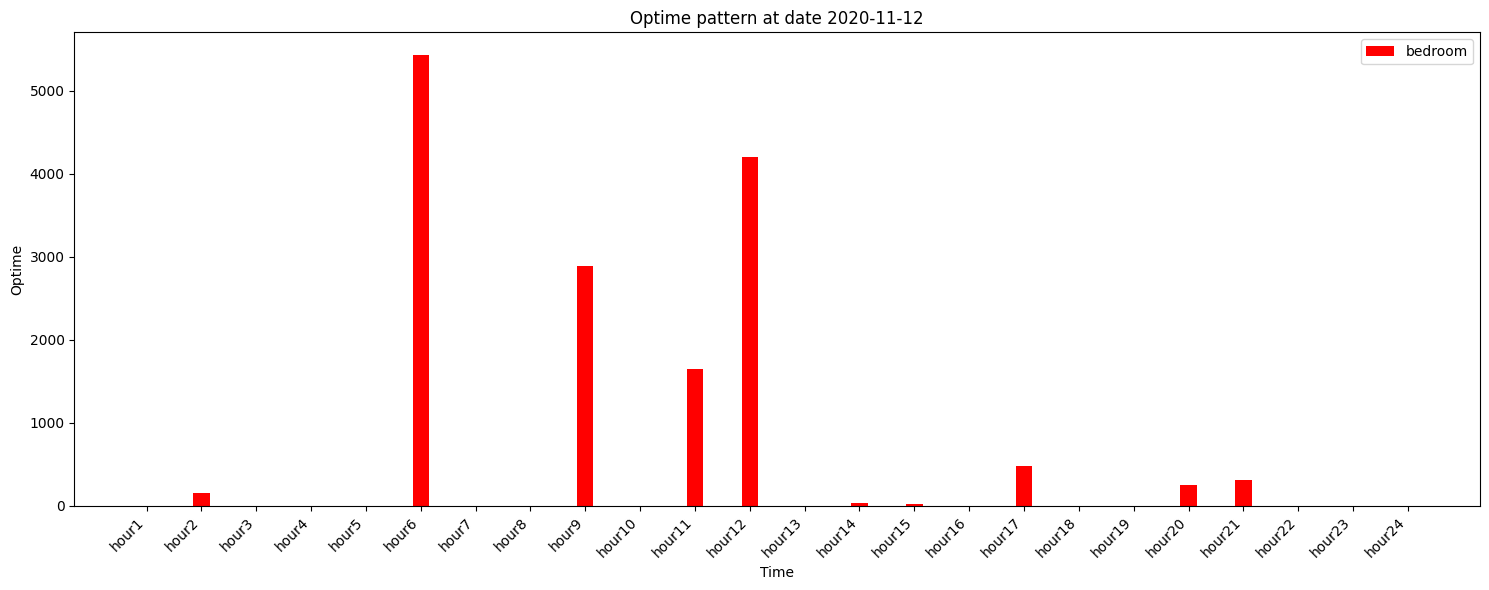

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = ["hour1", "hour2", "hour3", "hour4", "hour5", "hour6", "hour7", "hour8", "hour9", "hour10", 
     "hour11", "hour12", "hour13", "hour14", "hour15", "hour16", "hour17", "hour18", "hour19", 
     "hour20", "hour21", "hour22", "hour23", "hour24"]

# Sample data for bedroom_optime (replace this with your actual data)


width = 0.3  # Adjusting width for better spacing
p = np.arange(len(x))

plt.figure(figsize=(15, 6))  # Adjust figure size for better readability
plt.bar(p, bedroom_optim, width, color='red', label="bedroom")
plt.xlabel('Time')
plt.ylabel('Optime')
plt.title('Optime pattern at date 2020-11-12')
plt.xticks(p, x, rotation=45, ha="right")  # Rotating x-axis labels for better visibility
plt.legend()
plt.tight_layout()

plt.show()



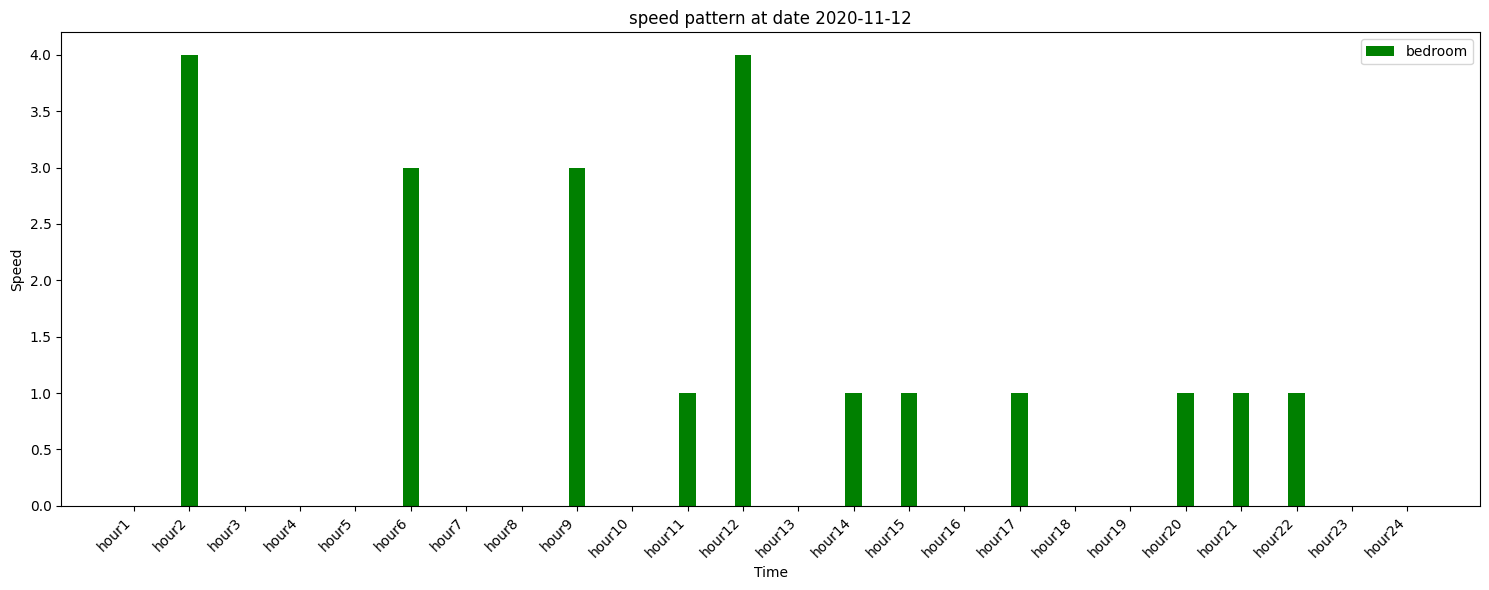

In [76]:
bedroom_speed = [0 if speed is None else speed for speed in bedroom_speed]
x = ["hour1", "hour2", "hour3", "hour4", "hour5", "hour6", "hour7", "hour8", "hour9", "hour10", 
     "hour11", "hour12", "hour13", "hour14", "hour15", "hour16", "hour17", "hour18", "hour19", 
     "hour20", "hour21", "hour22", "hour23", "hour24"]

p = np.arange(len(x))

plt.figure(figsize=(15, 6))  # Adjust figure size for better readability
plt.bar(p, bedroom_speed, width, color='green', label="bedroom")
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('speed pattern at date 2020-11-12')
plt.xticks(p, x, rotation=45, ha="right")  # Rotating x-axis labels for better visibility
plt.legend()
plt.tight_layout()

plt.show()




data cleaning


In [77]:
data_frame = data_frame[(data_frame["temperature"] > 28.0) & (data_frame["temperature"] < 33.0)]
print(data_frame.isnull().sum())
data_frame = data_frame.fillna(data_frame.mean())

data_frame['datetime'] = pd.to_datetime(data_frame['datetime'])  # Convert datetime column to datetime dtype


# Handle outliers (example for humidity)
data_frame = data_frame[(data_frame['humidity'] >= 0) & (data_frame['humidity'] <= 100)] 
duplicat_row=data_frame[data_frame.duplicated()]
if not duplicat_row.empty:
    data_frame=data_frame.drop_duplicates()

data_frame = data_frame.drop(columns=["speed"])
data_frame.head()



minutes          0
id               0
timestamp        0
temperature      0
humidity         0
mode             0
speed            0
opTime           0
eSpent           0
eSaved           0
timestampReal    0
datetime         0
year             0
month            0
day              0
hour             0
new_speed        0
dtype: int64


,minutes,id,timestamp,temperature,humidity,mode,opTime,eSpent,eSaved,timestampReal,datetime,year,month,day,hour,new_speed
0,0,83650.0,5.847604e+07,30.000000,30.000000,0.0,5430.000000,54300.000000,76020.0,1.605143e+09,2020-11-12 06:00:36.000000000,2020.0,11.0,12.000000,6.0,3
1,1,83628.0,5.845809e+07,30.666667,27.333333,0.0,2884.333333,42851.666667,54389.0,1.605125e+09,2020-11-12 01:01:27.333333248,2020.0,11.0,11.666667,9.0,3
4,5,83631.0,5.846192e+07,30.000000,27.000000,0.0,155.000000,1550.000000,2170.0,1.605129e+09,2020-11-12 02:05:23.000000000,2020.0,11.0,12.000000,2.0,4
5,6,83606.0,5.844578e+07,31.500000,26.500000,1.5,124.000000,2480.000000,4340.0,1.605113e+09,2020-11-11 21:36:22.000000000,2020.0,11.0,11.000000,21.5,4
6,7,83614.0,5.845306e+07,31.500000,26.500000,0.0,46.500000,775.000000,1302.0,1.605120e+09,2020-11-11 23:37:35.000000000,2020.0,11.0,11.500000,11.5,1


model apply

In [78]:
# model classiefier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB




X = data_frame[['temperature', 'humidity']]
y = data_frame['new_speed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]


results = {}


for name, clf in classifiers:
    

    pipeline = make_pipeline(StandardScaler(), clf)

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'cross_val_mean_accuracy': scores.mean(),
        'test_accuracy': test_accuracy
    }
    pre=pipeline.predict([[29,40]])
    print(f"{name} pridcition is {pre}")


best_classifier = max(results, key=lambda k: results[k]['cross_val_mean_accuracy'])



print("Results:")

for name, metrics in results.items():
    print(f"{name}: Cross-validation mean accuracy = {metrics['cross_val_mean_accuracy']:.4f}, Test accuracy = {metrics['test_accuracy']:.4f}")

print(f"\nBest classifier: {best_classifier} with cross-validation mean accuracy = {results[best_classifier]['cross_val_mean_accuracy']:.4f}")



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\b

Logistic Regression pridcition is [3]
Decision Tree pridcition is [4]


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection

Random Forest pridcition is [3]
Support Vector Machine pridcition is [1]
K-Nearest Neighbors pridcition is [1]
Naive Bayes pridcition is [3]
Results:
Logistic Regression: Cross-validation mean accuracy = 0.4500, Test accuracy = 0.6000
Decision Tree: Cross-validation mean accuracy = 0.3000, Test accuracy = 0.4000
Random Forest: Cross-validation mean accuracy = 0.3500, Test accuracy = 0.2000
Support Vector Machine: Cross-validation mean accuracy = 0.5500, Test accuracy = 0.4000
K-Nearest Neighbors: Cross-validation mean accuracy = 0.5000, Test accuracy = 0.4000
Naive Bayes: Cross-validation mean accuracy = 0.3500, Test accuracy = 0.6000

Best classifier: Support Vector Machine with cross-validation mean accuracy = 0.5500


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


p=data_frame[data_frame['new_speed']>0]

X = p[['temperature', 'humidity']]
y = p['new_speed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svc= SVC() # You can choose different values for n_neighbors


svc.fit(X_train_scaled, y_train)


y_pred = svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Test Accuracy: 0.4000
Confusion Matrix:
[[2 0 0]
 [2 0 0]
 [1 0 0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.13      0.33      0.19         5
weighted avg       0.16      0.40      0.23         5



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.